In [17]:
import random
import matplotlib.pyplot as plt
import numpy as np
import u3
import time
from functools import reduce
from scipy.signal import butter, lfilter, freqz

d = u3.U3()
def setFIO(speed1, speed2):
    d.getFeedback(u3.Timer0Config(TimerMode = 0, Value = int((1-speed1)*65535)))
    d.getFeedback(u3.Timer1Config(TimerMode = 0, Value = int((1-speed2)*65535)))


In [26]:
def getData(frequency, size):
    MAX_REQUESTS = 10
    d.configIO(NumberOfTimersEnabled = 2, FIOAnalog = 4)
    d.configTimerClock(TimerClockBase = 7, TimerClockDivisor = 15)
    trueFrequency = frequency*150
    trueSize = size*8
    direction = 0
    numbers = np.array([])
    while numbers.size < trueSize:
        if direction == 0:
            setFIO(1, 0)
            direction = 1
        elif direction == 1:
            setFIO(0, 1)
            direction = 0
        k = 0
        while (k < trueFrequency and numbers.size < trueSize):
            a1 = d.getAIN(0)
            #a3 = d.getAIN(2)
            #a4 = d.getAIN(3)
            numbers = np.append(numbers, a1)
            #numbers.append(a3)
            #numbers.append(a4)
            k = k+1
            time.sleep(0.01)
        setFIO(0,0)
    
    
    return numbers


def encrypt(inputMethod = 1, frequency = 0.2):
    # Read in the input file to be encrypted.
    if inputMethod == 0:
        with open('/Users/veronicabodenstein/Classes/input.txt', 'rb') as inputFile:
            rIn1 = inputFile.read()
        rIn = bytes(rIn1, 'utf-8')
    elif inputMethod == 1:
        rIn1 = input("What do you want to encrypt?")
        rIn = bytes(rIn1, 'utf-8')

    # Generate a random key of equal length to the input file.
    key = getData(frequency, len(rIn))

    def byteArrayXOR(a1, a2):
        # Calculate the elementwise XOR and return the result as bytes.
        return bytes(map(lambda x, y: x^y, a1,a2))
            
    
    encrypted = byteArrayXOR(rIn, key)
    print(f'The input is: {rIn} \n')
    print(f'The key is: {bytes(key)} \n')
    print(f'The encrypted data is: {encrypted} \n')
    with open('output.txt', 'wb') as outputFile:
        outputFile.write(encrypted)
    decrypted = byteArrayXOR(encrypted,key).decode('UTF-8')
    print(f'The decrypted data is: {decrypted}')


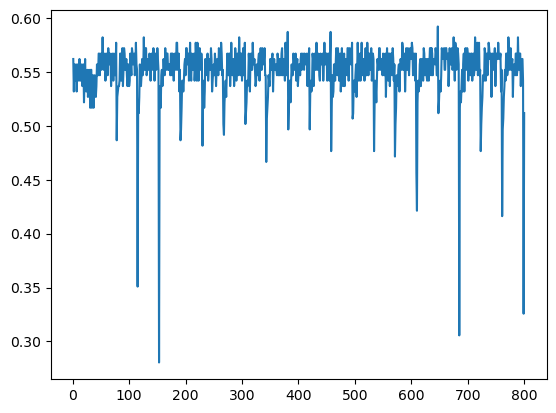

In [110]:
nums = getData(0.25,100)
plt.plot(np.arange(1,len(nums)+1,1),nums)

In [95]:
def chunkingData(numbers):
    def butter_lowpass(cutoff, fs, order=5):
        return butter(order, cutoff, fs=fs, btype='low', analog=False)

    def butter_lowpass_filter(data, cutoff, fs, order=5):
        b, a = butter_lowpass(cutoff, fs, order=order)
        y = lfilter(b, a, data)
        return y


    # Filter requirements.
    order = 6
    fs = 200       # sample rate, Hz
    cutoff = 10 # desired cutoff frequency of the filter, Hz

    y = butter_lowpass_filter(numbers-np.mean(numbers), cutoff, fs, order)

    plt.plot(np.arange(1,len(nums)+1,1), y)
    plt.show()
    return y
    ratio = []
    nMean = np.mean(numbers)
    nStd = np.std(numbers)
    for n in np.arange(1,len(numZbers),1):
        result = [np.mean(a) for a in np.array_split(numbers,n)]
        data = np.where(np.logical_or(result > nMean+0.69*nStd,result < nMean-0.69*nStd), 1, 0)
        ratio.append(sum(data)/len(data))
    return ratio



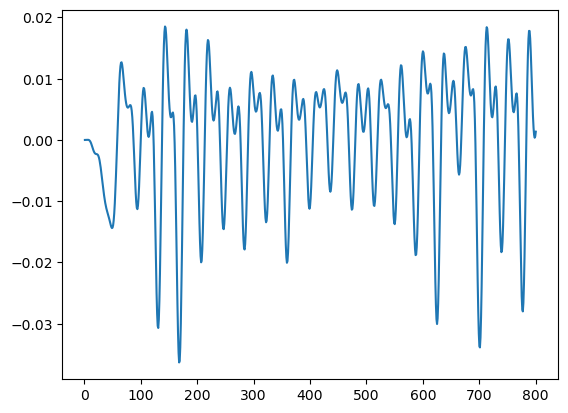

array([ 9.36100329e-08,  8.44862405e-07,  3.60632082e-06,  9.71420160e-06,
        1.83444247e-05,  2.46044036e-05,  1.95476134e-05, -8.05454802e-06,
       -6.98176127e-05, -1.76302158e-04, -3.34830067e-04, -5.46421319e-04,
       -8.03649745e-04, -1.09056677e-03, -1.38471110e-03, -1.66121326e-03,
       -1.89799020e-03, -2.07999609e-03, -2.20175221e-03, -2.26857478e-03,
       -2.29662497e-03, -2.31197944e-03, -2.34834910e-03, -2.44204986e-03,
       -2.62506886e-03, -2.91970983e-03, -3.33616623e-03, -3.87180091e-03,
       -4.51214297e-03, -5.23397470e-03, -6.00884228e-03, -6.80595600e-03,
       -7.59551292e-03, -8.35194231e-03, -9.05524411e-03, -9.69120280e-03,
       -1.02521674e-02, -1.07379196e-02, -1.11559856e-02, -1.15211909e-02,
       -1.18533539e-02, -1.21732981e-02, -1.24993325e-02, -1.28444781e-02,
       -1.32123620e-02, -1.35916251e-02, -1.39513975e-02, -1.42397153e-02,
       -1.43856503e-02, -1.43063711e-02, -1.39189586e-02, -1.31540199e-02,
       -1.19678797e-02, -

In [111]:
chunkingData(nums)